# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

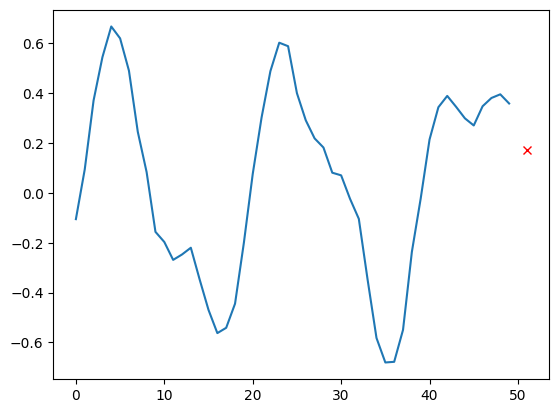

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.3842 - mean_squared_error: 0.3842 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0172 - val_mean_squared_error: 0.0172


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

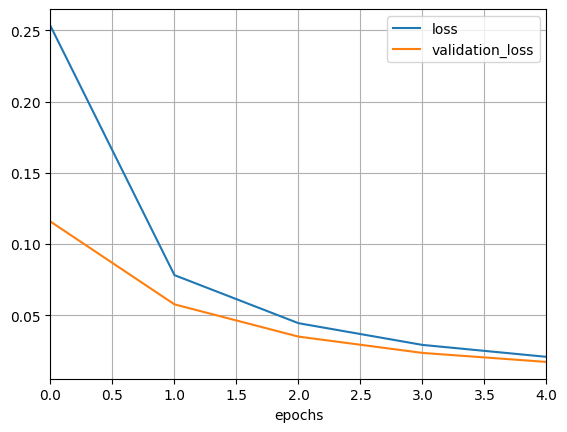

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.017306094989180565
Test MSE:  0.017306094989180565


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2880 - mean_squared_error: 0.2880 - val_loss: 0.1894 - val_mean_squared_error: 0.1894
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1547 - mean_squared_error: 0.1547 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0395 - val_mean_squared_error: 0.0395


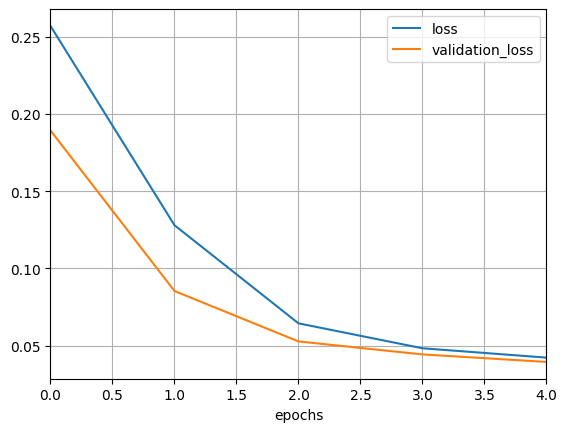

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0032108568120747805
Test MSE:  0.0032108568120747805


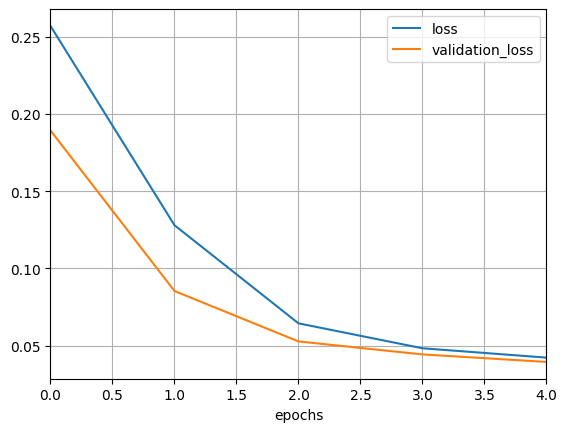

In [22]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [23]:
#from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
optimizer = Adam(learning_rate = 0.001)

In [31]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4980 - loss: 0.7042 - val_accuracy: 0.4938 - val_loss: 0.7055
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.5043 - loss: 0.6966 - val_accuracy: 0.4938 - val_loss: 0.7129
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5042 - loss: 0.6949 - val_accuracy: 0.4938 - val_loss: 0.6984
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4950 - loss: 0.6961 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4967 - loss: 0.6956 - val_accuracy: 0.4938 - val_loss: 0.6934


In [33]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print(f'Test accuracy: ', score1[1]*100, "%")

Test loss: 0.6932410001754761
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

network LSTM:

In [34]:
embed_size = 128
vocabulary_size = 1000

model1 = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer1 = Adam(learning_rate = 0.001)

model1.compile(loss="binary_crossentropy", optimizer=optimizer1, metrics=["accuracy"])

history = model1.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5399 - loss: 0.6821 - val_accuracy: 0.6116 - val_loss: 0.6601
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6101 - loss: 0.6616 - val_accuracy: 0.5296 - val_loss: 0.6910
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5568 - loss: 0.6789 - val_accuracy: 0.7198 - val_loss: 0.6220
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7758 - loss: 0.4989 - val_accuracy: 0.8024 - val_loss: 0.4236
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8264 - loss: 0.3880 - val_accuracy: 0.8222 - val_loss: 0.3935


In [35]:
score2 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print(f'Test accuracy: ', score2[1]*100, "%")

Test loss: 0.3849058151245117
Test accuracy:  82.6479971408844 %


GRU network:

In [36]:
embed_size = 128
vocabulary_size = 1000

model2 = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer2 = Adam(learning_rate = 0.001)

model2.compile(loss="binary_crossentropy", optimizer=optimizer2, metrics=["accuracy"])

history = model2.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5163 - loss: 0.6928 - val_accuracy: 0.6012 - val_loss: 0.6665
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7657 - loss: 0.4868 - val_accuracy: 0.8146 - val_loss: 0.3942
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8441 - loss: 0.3491 - val_accuracy: 0.8258 - val_loss: 0.3857
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8612 - loss: 0.3207 - val_accuracy: 0.8272 - val_loss: 0.3990
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8716 - loss: 0.2978 - val_accuracy: 0.8266 - val_loss: 0.3934


In [37]:
score3 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print(f'Test accuracy: ', score3[1]*100, "%")

Test loss: 0.37895631790161133
Test accuracy:  82.86399841308594 %


testing best acuracy


In [38]:
embed_size = 128
vocabulary_size = 1000

model3 = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
     keras.layers.GRU(128, return_sequences=True),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer3 = Adam(learning_rate = 0.001)

model3.compile(loss="binary_crossentropy", optimizer=optimizer3, metrics=["accuracy"])

history = model3.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.5303 - loss: 0.6887 - val_accuracy: 0.5972 - val_loss: 0.6728
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.5462 - loss: 0.6810 - val_accuracy: 0.6886 - val_loss: 0.5646
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.7872 - loss: 0.4573 - val_accuracy: 0.8180 - val_loss: 0.3983
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8379 - loss: 0.3647 - val_accuracy: 0.8296 - val_loss: 0.3854
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8493 - loss: 0.3488 - val_accuracy: 0.8352 - val_loss: 0.3807
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8639 - loss: 0.3208 - val_accuracy: 0.8312 - val_loss: 0.3783
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8655 - loss: 0.3092 - val_accuracy: 0.8324 - val_loss: 0.3816
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8706 - loss: 0.2988 - 

In [39]:
scorebest = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scorebest[0])
print(f'Test accuracy: ', scorebest[1]*100, "%")

Test loss: 0.4179645776748657
Test accuracy:  82.55599737167358 %
